Perceptrón Continuo en TensorFlow
===

* *30 min* | Última modificación: Julio 13, 2019.

## Modelo matemático

### Ecuación del perceptrón continuo

$$y = \sigma(u) = \sigma \left( w_0 + \sum_{i=1}^n w_i x_i  \right)$$

![assets/PerceptronRegresion-02.png](assets/PerceptronRegresion-02.png)

### Error instántaneo

$$
e_k = d_k-y_k= 
d_k-\sigma \left( \mathbf{w}^T_k \mathbf{x} \right)  =
d_k- \sigma \left( \sum_{i=0}^n w_{i,k} x_{i,k} \right)
$$

### Gradiente del error cuadrático instántaneo


$$\frac{\partial}{\partial \mathbf{w}} [e^2_k] = 
2 e_k \frac{\partial}{\partial \mathbf{w}} [e_k]  =
2 e_k \frac{\partial}{\partial \mathbf{w}} (d_k - y_k) =
2 e_k \left[ - \frac{\partial}{\partial \mathbf{w}}y_k  \right]
$$

$$
y_k = \sigma \left( \sum_{i=0}^n w_{i,k} x_{i,k} \right)
= \sigma (\mathbf{w}^T_k \mathbf{x}_k) 
= \sigma ( s_k )
$$

$$s_k = \mathbf{w}^T_k \mathbf{x}_k$$

$$
\frac{\partial}{\partial \mathbf{w}}y_k = 
\frac{\partial}{\partial \mathbf{w}_k} \sigma (s_k) = 
\sigma' (s_k) \frac{\partial s_k}{\partial \mathbf{w} }
$$

$$
\frac{\partial}{\partial \mathbf{w}_k} [e^2_k] = 
2 e_k \left[ - \frac{\partial}{\partial \mathbf{w}}y_k  \right] = 
2 e_k \left[ -\sigma' (s_k) \frac{\partial s_k}{\partial \mathbf{w} } \right] = 
-2 e_k \sigma' \left(s_k\right) \mathbf{x}_k
$$

### Método del gradiente

$$
\mathbf{w}_{k+1} = \mathbf{w}_k - \mu \frac{\partial}{\partial\mathbf{w}} \left[ e^2_k\right] =
\mathbf{w}_k + 2 \mu e_k \sigma' \left(s_k \right) \mathbf{x}_k
$$

### Derivadas de la función de activación

* Para la función logistica-sigmoidea:

$$
\sigma (u) = \frac{1}{1+\exp(-u)}, \quad  \frac{\partial }{\partial u} \sigma(u)=\sigma(u)[1-\sigma(u)]
$$


* Para la función $\tanh$:

$$
\sigma(u) = \tanh(u) = \frac{\exp(u) - \exp(-u)}{\exp(u) + \exp(-u)}, \quad \frac{d}{du} \sigma(u) = 1 - \sigma(u)^2
$$

### Ecuación de mejora

$$
\mathbf{w}_{k+1} = 
\mathbf{w}_k + 2 \mu e_k \cdot \sigma(u)[1-\sigma(u)] \cdot  \mathbf{x}_k
$$

## Regresión no lineal usando perceptrones continuos

### Dependencias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

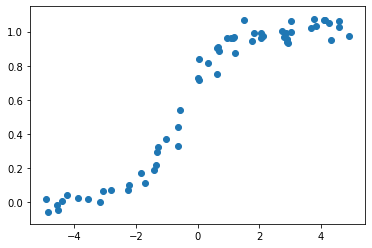

In [2]:
n_samples = 60
np.random.seed(1234)
X = np.random.uniform(-5, 5, n_samples)
d = 1./(1 + np.exp(-(1.0 + 1.53 * X))) + 0.05 * np.random.normal(size=n_samples)
X = np.array([[e] for e in X])
plt.scatter(X, d);

### Implementación en TensorFlow usando operaciones elementales

In [3]:
import tensorflow as tf

##
## Convierte los datos en tensores
##
X_ = tf.constant(X, dtype=np.float32) 
d_ = tf.constant(d, dtype=np.float32) 

##
## Parametros del perceptron
##
coef_ = tf.Variable([[0.01]], dtype=np.float32)
intercept_ = tf.Variable(0, dtype=np.float32)

##
##  Calcula el error
##
SSE = tf.reduce_sum(
    tf.square(d_ -
              (tf.transpose(
                  tf.nn.sigmoid(intercept_ + tf.matmul(X_, coef_)))))[0])

##
##  Inicializa el optimizador
##
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# opt = tf.train.AdadeltaOptimizer(learning_rate=0.01, rho=0.95, epsilon=1e-08)
# opt = tf.train.AdagradOptimizer(learning_rate=0.1)
# opt = tf.train.AdamOptimizer(learning_rate=0.001)

##
##  Pronostico
##
x_pred = np.linspace(start=-4.5, stop=4.5, num=50)
X_pred_ = tf.constant([[u] for u in x_pred], dtype=np.float32)
y_pred_ = tf.nn.sigmoid(tf.matmul(X_pred_, coef_) + intercept_)

opt = opt.minimize(SSE)

h = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(400):
        sess.run(opt)
        h.append(SSE.eval())
        if (i % 100 == 0):
            print(sess.run(SSE))        
    
    y_pred = y_pred_.eval()

3.5712192
0.19579235
0.15588039
0.14806175


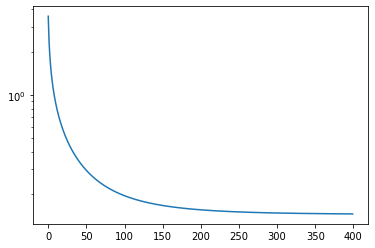

In [4]:
##
## Error de entrenamiento
##
plt.plot(h)
plt.yscale('log')

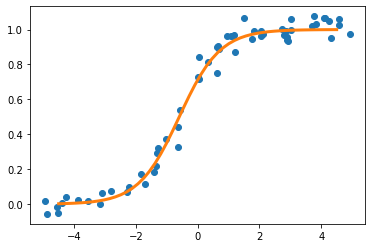

In [5]:
##
## Pronóstico
##
plt.plot(X, d, 'o')
plt.plot(x_pred, y_pred, linewidth=3)